In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') # this gives white grid in background
%matplotlib inline

In [4]:
#from pandas.io.data import DataReader
from pandas_datareader import data # imp

In [5]:
from __future__ import division

In [6]:
tech_list =['AAPL','GOOG','MSFT','AMZN']
#tech_list = ['NASDAQ:AAPL','NASDAQ:MSFT','NYSE:GE','NYSE:IBM','NYSE:AA','NYSE:DAL','NYSE:UAL', 'NYSE:PEP', 'NYSE:KO']

In [7]:
import time
from datetime import datetime, date, time, timedelta



In [8]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

import pandas_datareader as pdr  # imp
import pandas_datareader.data as web  #imp



In [9]:
###### vv IMP
for stock in tech_list :
   
    globals()[stock]=web.DataReader(stock,'stooq', start, end)
    #globals()[stock]=web.DataReader(stock,'yahoo', start, end)     # yahoo is not working there is some server issue
    


In [10]:
GOOG.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-09-03,2882.92,2907.5400,2870.10,2895.50,955524
2021-09-02,2918.99,2926.5000,2882.13,2884.38,1092790
2021-09-01,2913.00,2936.4099,2912.29,2916.84,791234
2021-08-31,2917.69,2922.2400,2900.00,2909.24,1337821
2021-08-30,2894.09,2929.7899,2892.00,2909.39,845795


In [11]:
GOOG.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-14,1539.005,1563.9999,1515.7400,1519.28,1696589
2020-09-11,1536.000,1575.2000,1497.3600,1520.72,1597087
2020-09-10,1560.640,1584.0810,1525.8050,1532.02,1618557
2020-09-09,1557.530,1569.0000,1536.0511,1556.96,1774704
2020-09-08,1533.510,1563.8650,1528.0100,1532.39,2610884


In [12]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,128.537390,129.972089,127.057809,128.538406,1.032314e+08
std,11.250912,11.164180,11.459555,11.404626,3.897562e+07
min,103.860000,109.490000,102.450000,106.160000,4.646719e+07
25%,119.995000,121.610000,118.530000,120.180000,7.654737e+07
50%,127.480000,128.270000,126.020000,127.210000,9.437220e+07
75%,135.080000,136.035000,133.240000,134.495000,1.177848e+08
max,153.870000,154.980000,153.090000,154.300000,2.889515e+08


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-09-03 to 2020-09-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Close   251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


<AxesSubplot:xlabel='Date'>

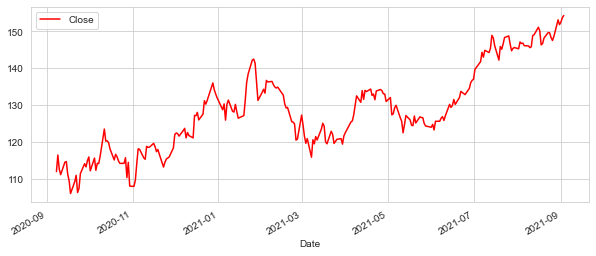

In [14]:
AAPL['Close'].plot(legend=True,figsize=(10,4),color='red')

<AxesSubplot:xlabel='Date'>

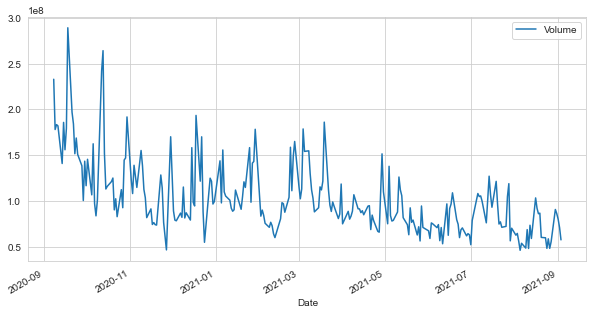

In [15]:
AAPL['Volume'].plot(legend=True,figsize=(10,5))

In [16]:
####################################### 

In [17]:
ma_day=[10,20,50]

for ma in ma_day :
    col_name = "MA for %s days" %(str(ma))
    AAPL[col_name]=AAPL['Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date', ylabel='Price'>

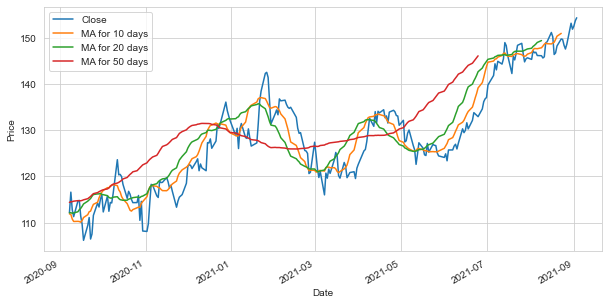

In [18]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,5),ylabel='Price')

<AxesSubplot:xlabel='Date'>

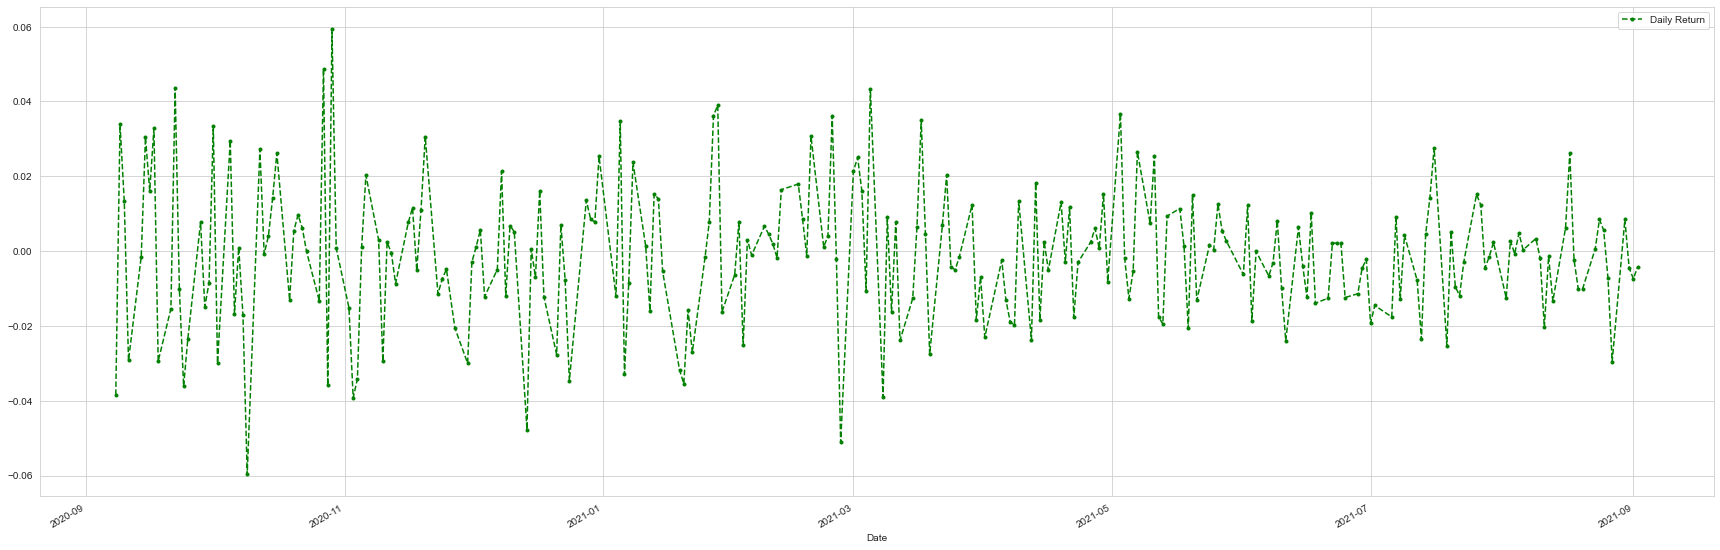

In [19]:
AAPL['Daily Return']=AAPL['Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(30,10),legend=True,linestyle='--',marker='.',color='green')

/Users/pratik./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

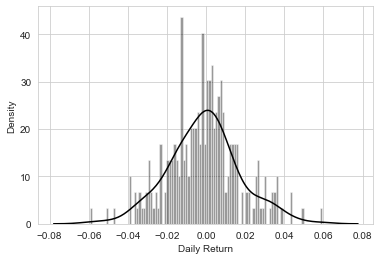

In [20]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='black')

<AxesSubplot:>

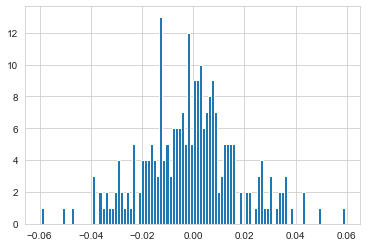

In [21]:
AAPL['Daily Return'].hist(bins=100)

In [22]:
closing_df= web.DataReader(tech_list,'stooq',start,end)['Close']

In [23]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-03,154.30,2895.50,301.14,3478.05
2021-09-02,153.65,2884.38,301.15,3463.12
2021-09-01,152.51,2916.84,301.83,3479.00
2021-08-31,151.83,2909.24,301.88,3470.79
2021-08-30,153.12,2909.39,303.59,3421.57
...,...,...,...,...
2020-09-14,114.63,1519.28,203.54,3102.97
2020-09-11,111.28,1520.72,202.17,3116.22
2020-09-10,112.76,1532.02,203.50,3175.11


In [24]:
tech_rets=closing_df.pct_change()  # return of tech stocks daily

In [25]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-03,NaN,NaN,NaN,NaN
2021-09-02,-0.004213,-0.003840,0.000033,-0.004293
2021-09-01,-0.007419,0.011254,0.002258,0.004585
2021-08-31,-0.004459,-0.002606,0.000166,-0.002360
2021-08-30,0.008496,0.000052,0.005665,-0.014181


In [26]:
tech_rets.tail()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-14,-0.001481,-0.014376,-0.016097,-0.016843
2020-09-11,-0.029224,0.000948,-0.006731,0.004270
2020-09-10,0.013300,0.007431,0.006579,0.018898
2020-09-09,0.033877,0.016279,0.028894,0.029448
2020-09-08,-0.038429,-0.015781,-0.040835,-0.036337


/Users/pratik./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


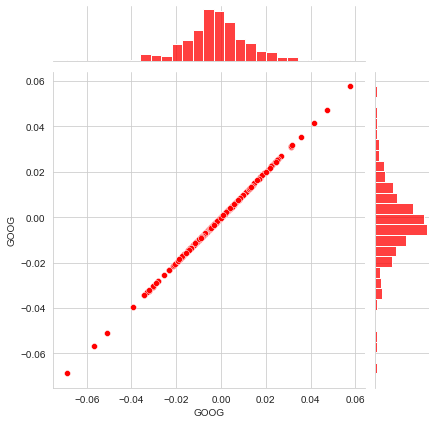

In [27]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='red') # as both x and y are same it depicts 1 straight line x=y

/Users/pratik./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


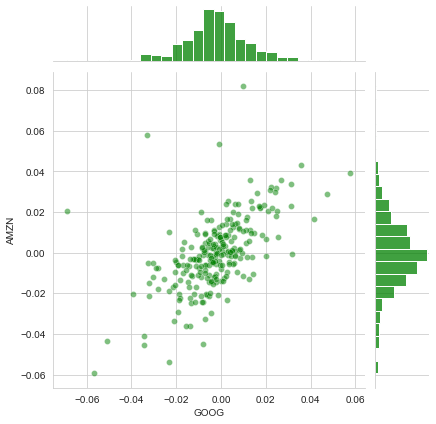

In [28]:
sns.jointplot('GOOG','AMZN',tech_rets,kind='scatter',color='green',alpha=0.5) # this scatter plot shows how similar both they were

/Users/pratik./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


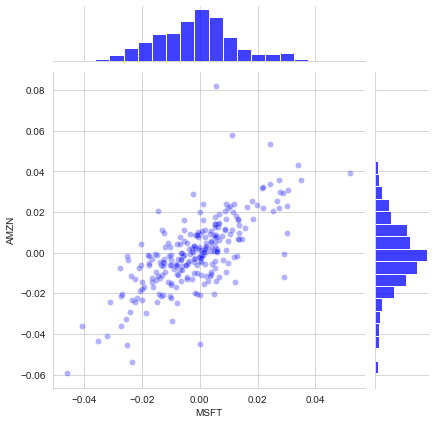

In [40]:
sns.jointplot('MSFT','AMZN',tech_rets,kind='scatter',color='blue',alpha=0.3)

/Users/pratik./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


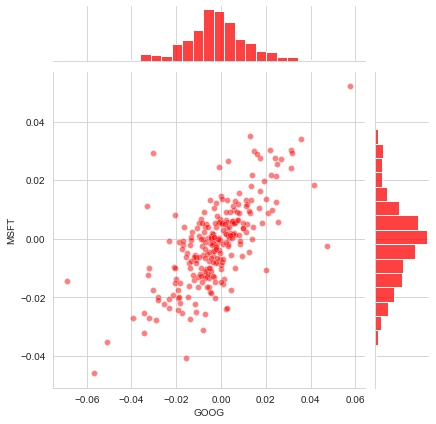

In [30]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='red', alpha =0.5) 

In [31]:
###################################

In [32]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-03,NaN,NaN,NaN,NaN
2021-09-02,-0.004213,-0.003840,0.000033,-0.004293
2021-09-01,-0.007419,0.011254,0.002258,0.004585
2021-08-31,-0.004459,-0.002606,0.000166,-0.002360
2021-08-30,0.008496,0.000052,0.005665,-0.014181


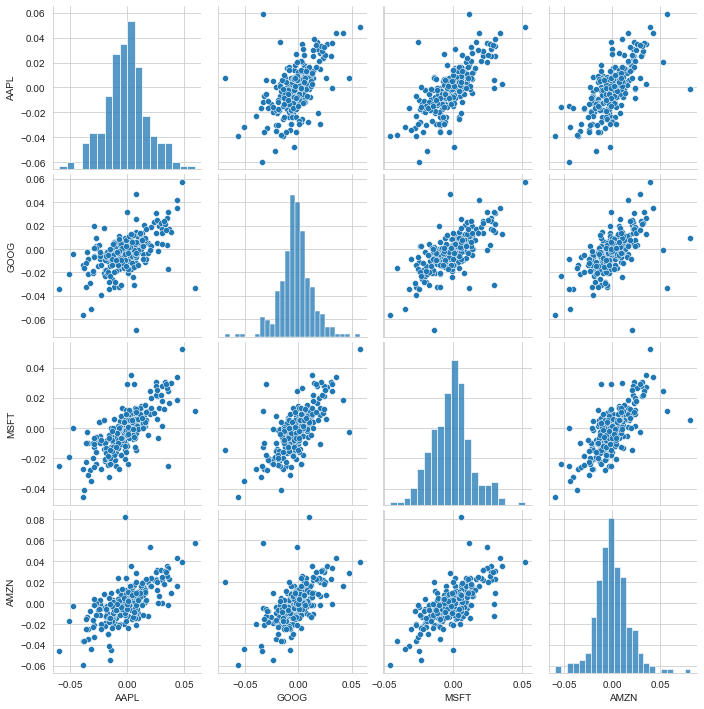

In [33]:

sns.pairplot(tech_rets.dropna())

# gives relation of each wrt other , we removed Nan values
# this give scatterplot of each compared to other


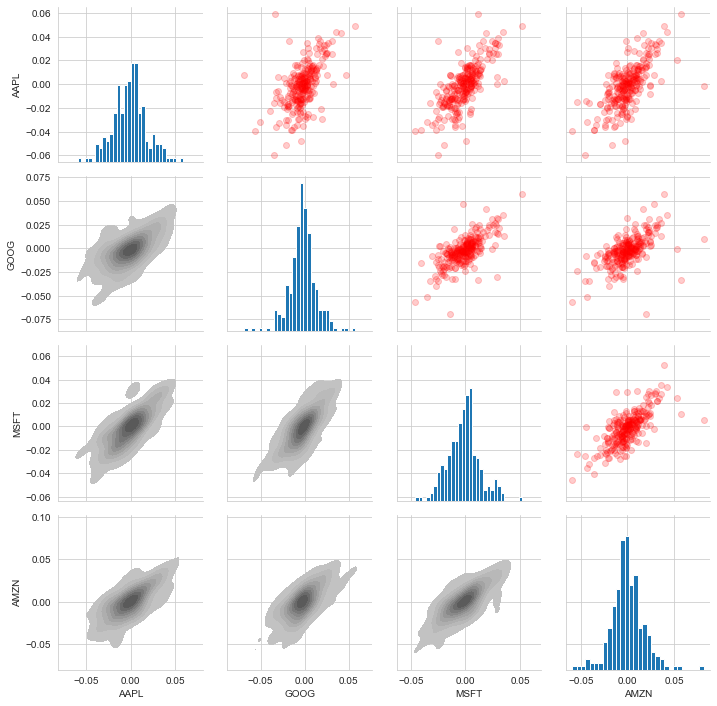

In [34]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='red', alpha = 0.2) # scatter plot in upper part i.e above diagonal of larger sq

returns_fig.map_lower(sns.kdeplot,fill = True,color='black')  # kde plot in lower part i.e below diagonal of larger sq

returns_fig.map_diag(plt.hist,bins=30) # along diagonal

# this whole gives more control to us in terms of color , position etc IMP

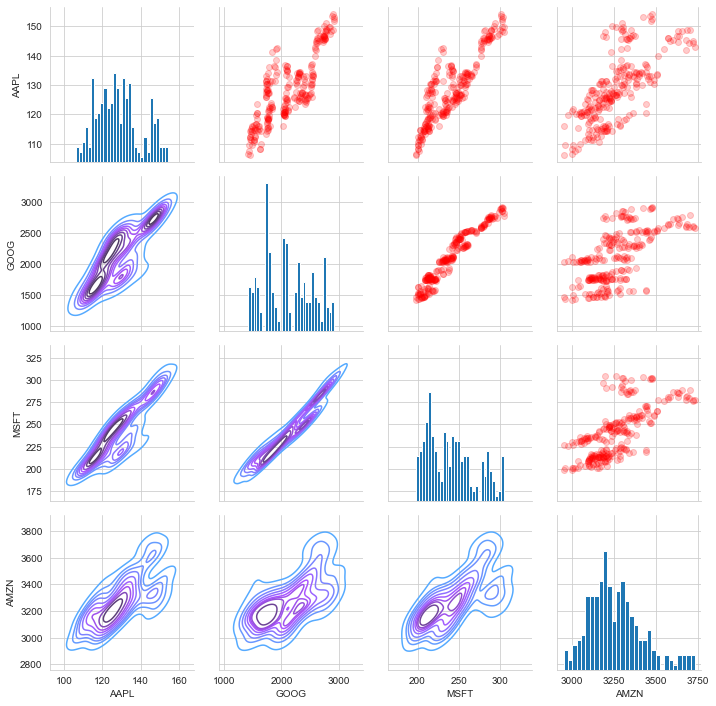

In [35]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='red', alpha = 0.2) #rger sq

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')  # arger sq

returns_fig.map_diag(plt.hist,bins=30) 

# we compare closing prices

In [36]:
############################

/Users/pratik./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

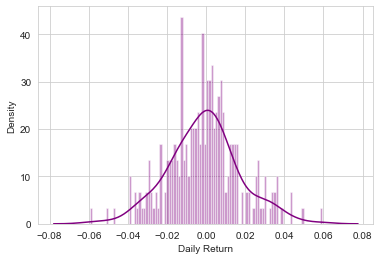

In [37]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')